In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime as dt

In [162]:
customers = pd.read_csv('../data/raw/customer_data.csv', sep=',')
payments = pd.read_csv('../data/raw/payment_data.csv', sep=',')

In [7]:
customers.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [8]:
payments.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


# Customers

In [9]:
customers.shape

(1125, 13)

In [10]:
customers['label'].value_counts()

0    900
1    225
Name: label, dtype: int64

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB


In [12]:
customers.describe()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [16]:
customers['fea_2'].value_counts().count()

158

<AxesSubplot:xlabel='fea_2', ylabel='Count'>

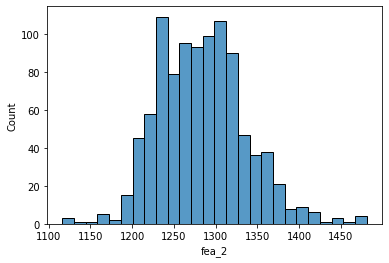

In [18]:
sns.histplot(x='fea_2', data=customers)

<AxesSubplot:xlabel='fea_2'>

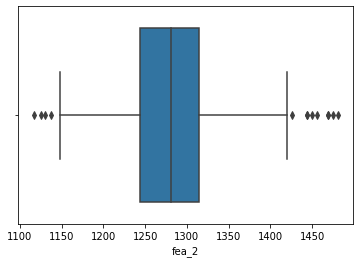

In [19]:
sns.boxplot(x='fea_2', data=customers)

In [163]:
nulos = customers[customers['fea_2'].isnull()]
nulos.head(20)

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141
9,0,54990497,4,NaN,2,35000.0,2,8,5,101,3,60029,237.301496
13,0,59003965,4,NaN,2,76000.0,2,8,9,113,4,60091,158.407702
19,1,59000383,4,NaN,2,47000.0,2,8,9,107,5,151300,1.000000
20,0,58994740,7,NaN,2,77000.0,2,11,9,114,5,510000,159.699718
26,1,59004540,4,NaN,2,34000.0,2,8,5,100,5,72049,163.294213
32,0,58985693,5,NaN,3,227000.0,2,15,-1,110,4,450080,183.030052
36,0,58994549,7,NaN,2,90000.0,2,11,2,114,4,151300,173.205081
43,0,54989325,4,NaN,2,49000.0,2,8,-1,113,4,72001,180.723546
65,1,58995151,7,NaN,2,126000.0,2,11,9,115,4,450028,224.267697


In [26]:
nulos['fea_3'].value_counts()

2    130
3     19
Name: fea_3, dtype: int64

In [27]:
customers['fea_3'].value_counts()

3    684
1    309
2    132
Name: fea_3, dtype: int64

<AxesSubplot:>

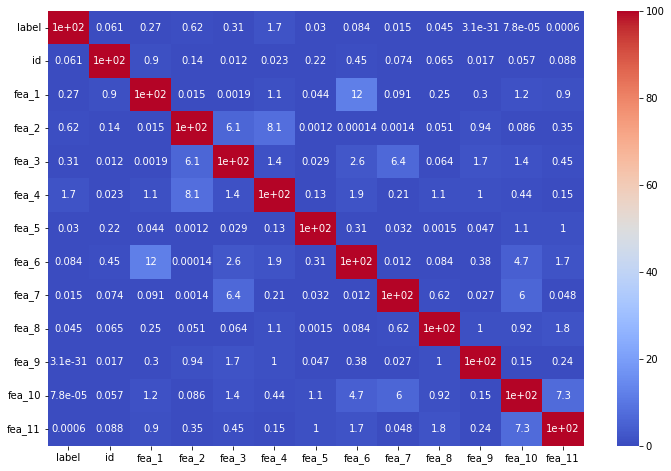

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(customers.corr()**2*100, cmap='coolwarm', annot=True)

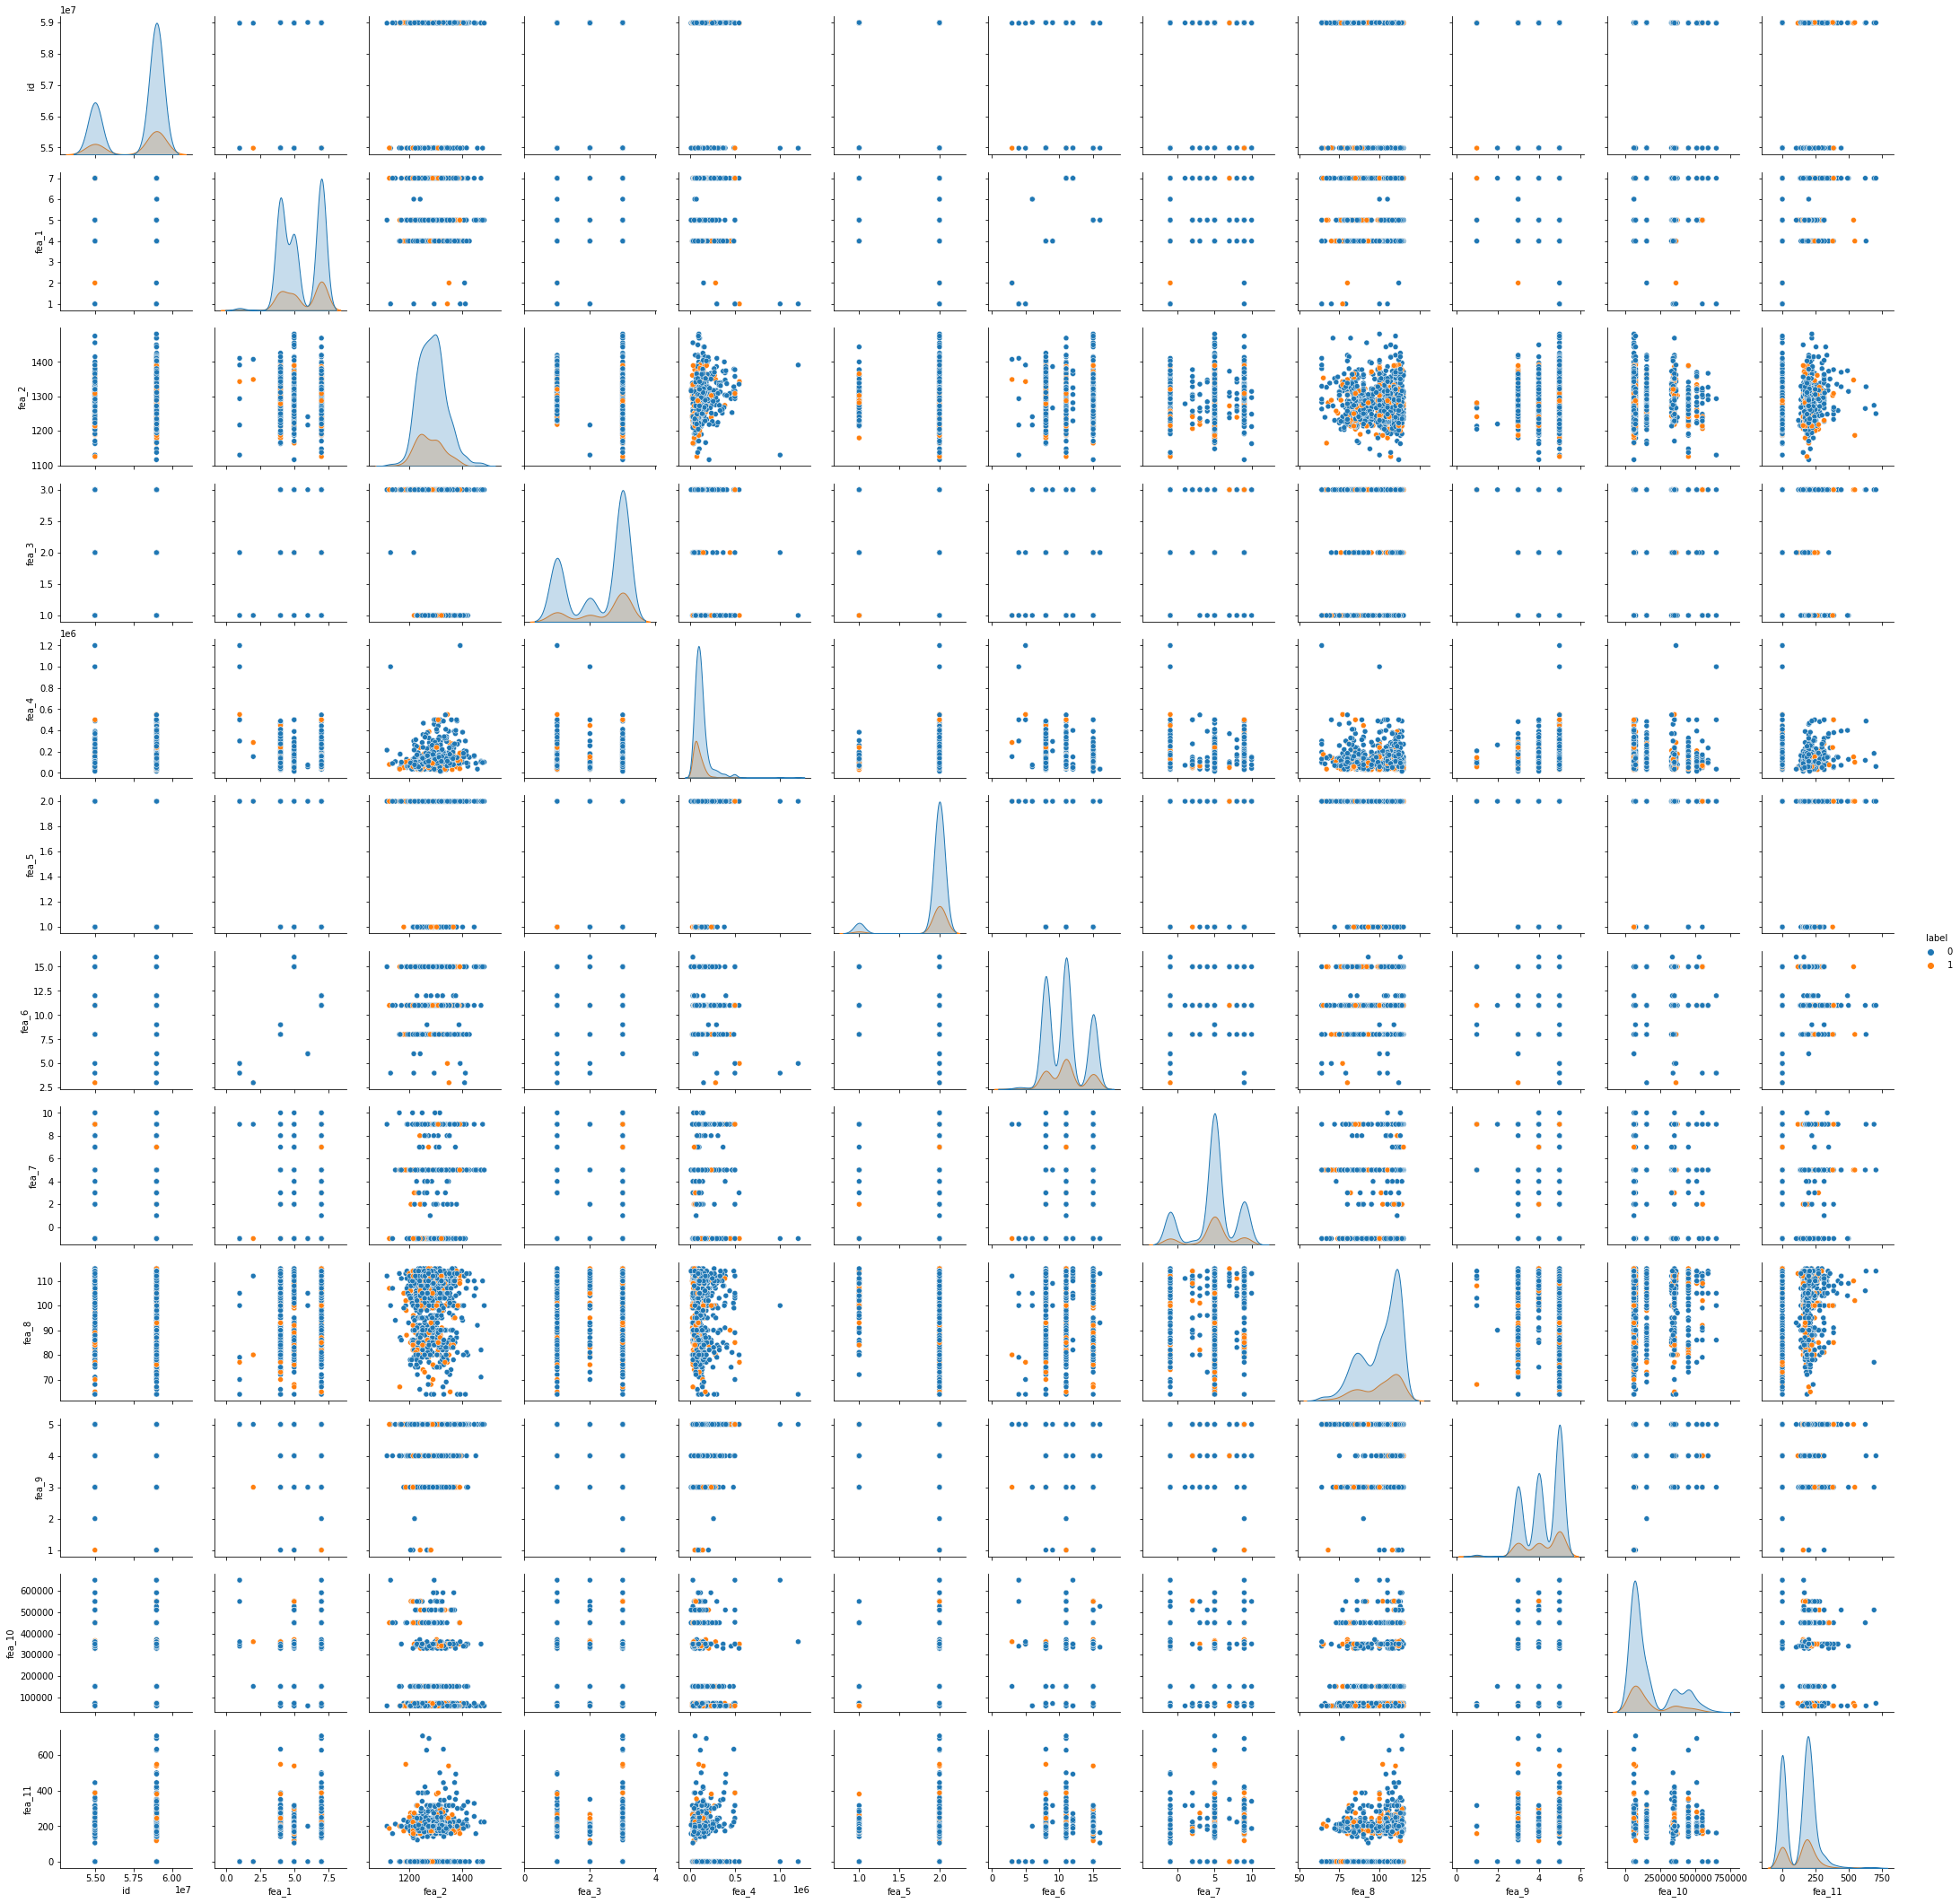

In [48]:
sns.pairplot(data=customers, hue='label')

In [164]:
customers['fea_2'].fillna(customers['fea_2'].mean(), inplace=True)

In [ ]:
customers

## Payments

In [121]:
payments.duplicated().value_counts()

False    8159
True       91
dtype: int64

In [165]:
payments.drop_duplicates(keep='first', inplace=True)

In [124]:
payments.head(10)

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016
5,59004828,0,0,0,0,3,10,88000.0,02/12/2016,3196.8,6193.0,15/04/2016
6,58994429,0,0,0,0,2,10,16500.0,02/12/2016,3252.0,3210.0,NaN
7,54987756,0,0,0,0,2,1,NaN,02/12/2016,365331.6,304943.0,NaN
8,58988028,0,0,0,0,4,0,NaN,02/12/2016,16795.2,28500.0,19/04/2016
9,58993180,0,0,0,0,3,6,NaN,02/12/2016,26688.0,31300.0,20/03/2016


In [125]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8159 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8159 non-null   int64  
 1   OVD_t1           8159 non-null   int64  
 2   OVD_t2           8159 non-null   int64  
 3   OVD_t3           8159 non-null   int64  
 4   OVD_sum          8159 non-null   int64  
 5   pay_normal       8159 non-null   int64  
 6   prod_code        8159 non-null   int64  
 7   prod_limit       2119 non-null   float64
 8   update_date      8138 non-null   object 
 9   new_balance      8159 non-null   float64
 10  highest_balance  7763 non-null   float64
 11  report_date      7068 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 828.6+ KB


In [126]:
payments['report_date'].fillna(0, inplace=True)
payments['report_date'] = pd.to_datetime(payments['report_date'])


c:\Users\LUCAS\creditanalysis\.creditanalysis\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/04/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\LUCAS\creditanalysis\.creditanalysis\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '25/04/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\LUCAS\creditanalysis\.creditanalysis\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/04/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\LUCAS\creditanalysis\.creditanalysis\lib\site-packages\pandas\core\tools\datetimes.py:10

In [127]:
payments.shape

(8159, 12)

In [128]:
payments.describe()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
count,8.159000e+03,8159.000000,8159.000000,8159.000000,8159.000000,8159.000000,8159.000000,2119.000000,8.159000e+03,7.763000e+03
mean,5.782436e+07,0.246354,0.126731,0.371859,188.803407,14.550803,8.237897,85790.677253,1.061979e+05,2.202388e+05
std,1.821535e+06,1.242424,0.861944,2.914862,1813.261311,12.048854,3.525400,74502.584522,1.898152e+06,2.828591e+06
min,5.498235e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,-4.030320e+04,5.010000e+02
25%,5.499032e+07,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,37400.000000,0.000000e+00,2.330250e+04
50%,5.898908e+07,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,67650.000000,0.000000e+00,4.374100e+04
75%,5.899656e+07,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,112200.000000,2.509320e+04,1.005000e+05
max,5.900624e+07,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,660000.000000,1.632120e+08,1.800005e+08


In [129]:
payments['OVD_sum'].value_counts()

0       7253
1         76
30        51
15        19
2         15
        ... 
97         1
3394       1
2269       1
2160       1
690        1
Name: OVD_sum, Length: 393, dtype: int64

In [130]:
payments[payments['OVD_t1'] > 1]

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
561,59004688,6,0,0,6,1,2,NaN,10/11/2015,2829721.2,2365369.0,2016-04-14
754,54986075,2,0,0,18,11,10,70400.0,01/10/2015,41290.8,51621.0,2015-12-12
1067,58995080,3,0,0,3,9,10,82500.0,05/08/2015,16772.4,74374.0,2016-04-30
1225,54983039,2,1,0,49,3,10,NaN,04/07/2015,517.2,973.0,2015-07-21
1292,54991742,5,0,0,25,5,3,NaN,19/06/2015,2773419.6,2376998.0,2016-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...
8173,58989284,8,3,0,450,11,10,NaN,04/12/1999,0.0,21281.0,2007-09-11
8174,58992325,3,2,1,360,9,10,NaN,02/09/1999,0.0,46433.0,1970-01-01
8195,54986948,12,7,0,810,6,10,NaN,08/09/1997,0.0,38390.0,1970-01-01
8210,54990497,12,0,0,12,24,10,103400.0,28/01/1996,116726.4,100219.0,2016-03-06


In [166]:
num_transactions = payments.reset_index()['id'].value_counts().reset_index()
num_transactions.columns = ['id', 'transactions']

customers = customers.merge(num_transactions, on='id', how='left')

In [133]:
payments.isnull().sum()

id                    0
OVD_t1                0
OVD_t2                0
OVD_t3                0
OVD_sum               0
pay_normal            0
prod_code             0
prod_limit         6040
update_date          21
new_balance           0
highest_balance     396
report_date           0
dtype: int64

In [134]:
payments[payments['update_date'].isnull()]

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
8224,59004540,0,0,0,0,1,10,13200.0,NaN,0.0,NaN,1970-01-01
8225,58991271,0,0,0,0,1,1,NaN,NaN,0.0,NaN,1970-01-01
8226,58991271,0,0,0,0,1,0,NaN,NaN,0.0,NaN,1970-01-01
8227,58996823,0,0,0,0,2,6,NaN,NaN,74120.4,67500.0,1970-01-01
8228,54988633,0,0,0,0,5,13,NaN,NaN,20776.8,36200.0,1970-01-01
8229,59005708,0,0,0,0,35,15,NaN,NaN,0.0,NaN,1970-01-01
8230,54992408,0,0,0,0,1,2,NaN,NaN,0.0,NaN,1970-01-01
8231,58995478,0,0,0,0,1,15,NaN,NaN,0.0,NaN,1970-01-01
8233,58995478,0,0,0,0,9,15,NaN,NaN,0.0,NaN,1970-01-01
8234,58991389,0,0,0,0,3,6,NaN,NaN,7488.0,10540.0,1970-01-01


In [167]:
payments['OVD_times'] = payments[['OVD_t1', 'OVD_t2', 'OVD_t3']].sum(axis=1)
payments.drop(['OVD_t1', 'OVD_t2', 'OVD_t3'], axis=1, inplace=True)

In [168]:
payments.groupby('id')['OVD_sum', 'pay_normal', 'OVD_times'].sum().sort_values(by='OVD_sum', ascending=False)


C:\Users\LUCAS\AppData\Local\Temp\ipykernel_16532\1082774297.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  payments.groupby('id')['OVD_sum', 'pay_normal', 'OVD_times'].sum().sort_values(by='OVD_sum', ascending=False)


,OVD_sum,pay_normal,OVD_times
id,,,
54984903,81050,46,118
54989873,76200,38,90
58990934,70510,128,170
58984653,69435,46,110
58994346,67891,278,189
...,...,...,...
58988092,0,126,0
58988166,0,14,0
58988196,0,106,0


In [169]:
features = payments.groupby('id')['OVD_sum', 'pay_normal', 'OVD_times'].\
    agg({'OVD_sum': 'mean', 'pay_normal': 'sum', 'OVD_times': 'sum'}).sort_values(by='OVD_sum', ascending=False).reset_index()


C:\Users\LUCAS\AppData\Local\Temp\ipykernel_16532\1014524652.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  features = payments.groupby('id')['OVD_sum', 'pay_normal', 'OVD_times'].\


In [170]:
customers = customers.merge(features, on='id')
customers.head()

,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11,transactions,OVD_sum,pay_normal,OVD_times
0,1,54982665,5,1245.500000,3,77000.0,2,15,5,109,5,151300,244.948974,4,2976.5,34,28
1,0,59004779,4,1277.000000,1,113000.0,2,8,-1,100,3,341759,207.173840,15,13.0,174,4
2,0,58990862,7,1298.000000,1,110000.0,2,11,-1,101,5,72001,1.000000,6,0.0,64,0
3,1,58995168,7,1335.500000,1,151000.0,2,11,5,110,3,60084,1.000000,4,0.0,92,0
4,0,54987320,7,1283.911373,2,59000.0,2,11,5,108,4,450081,197.403141,9,0.0,193,0


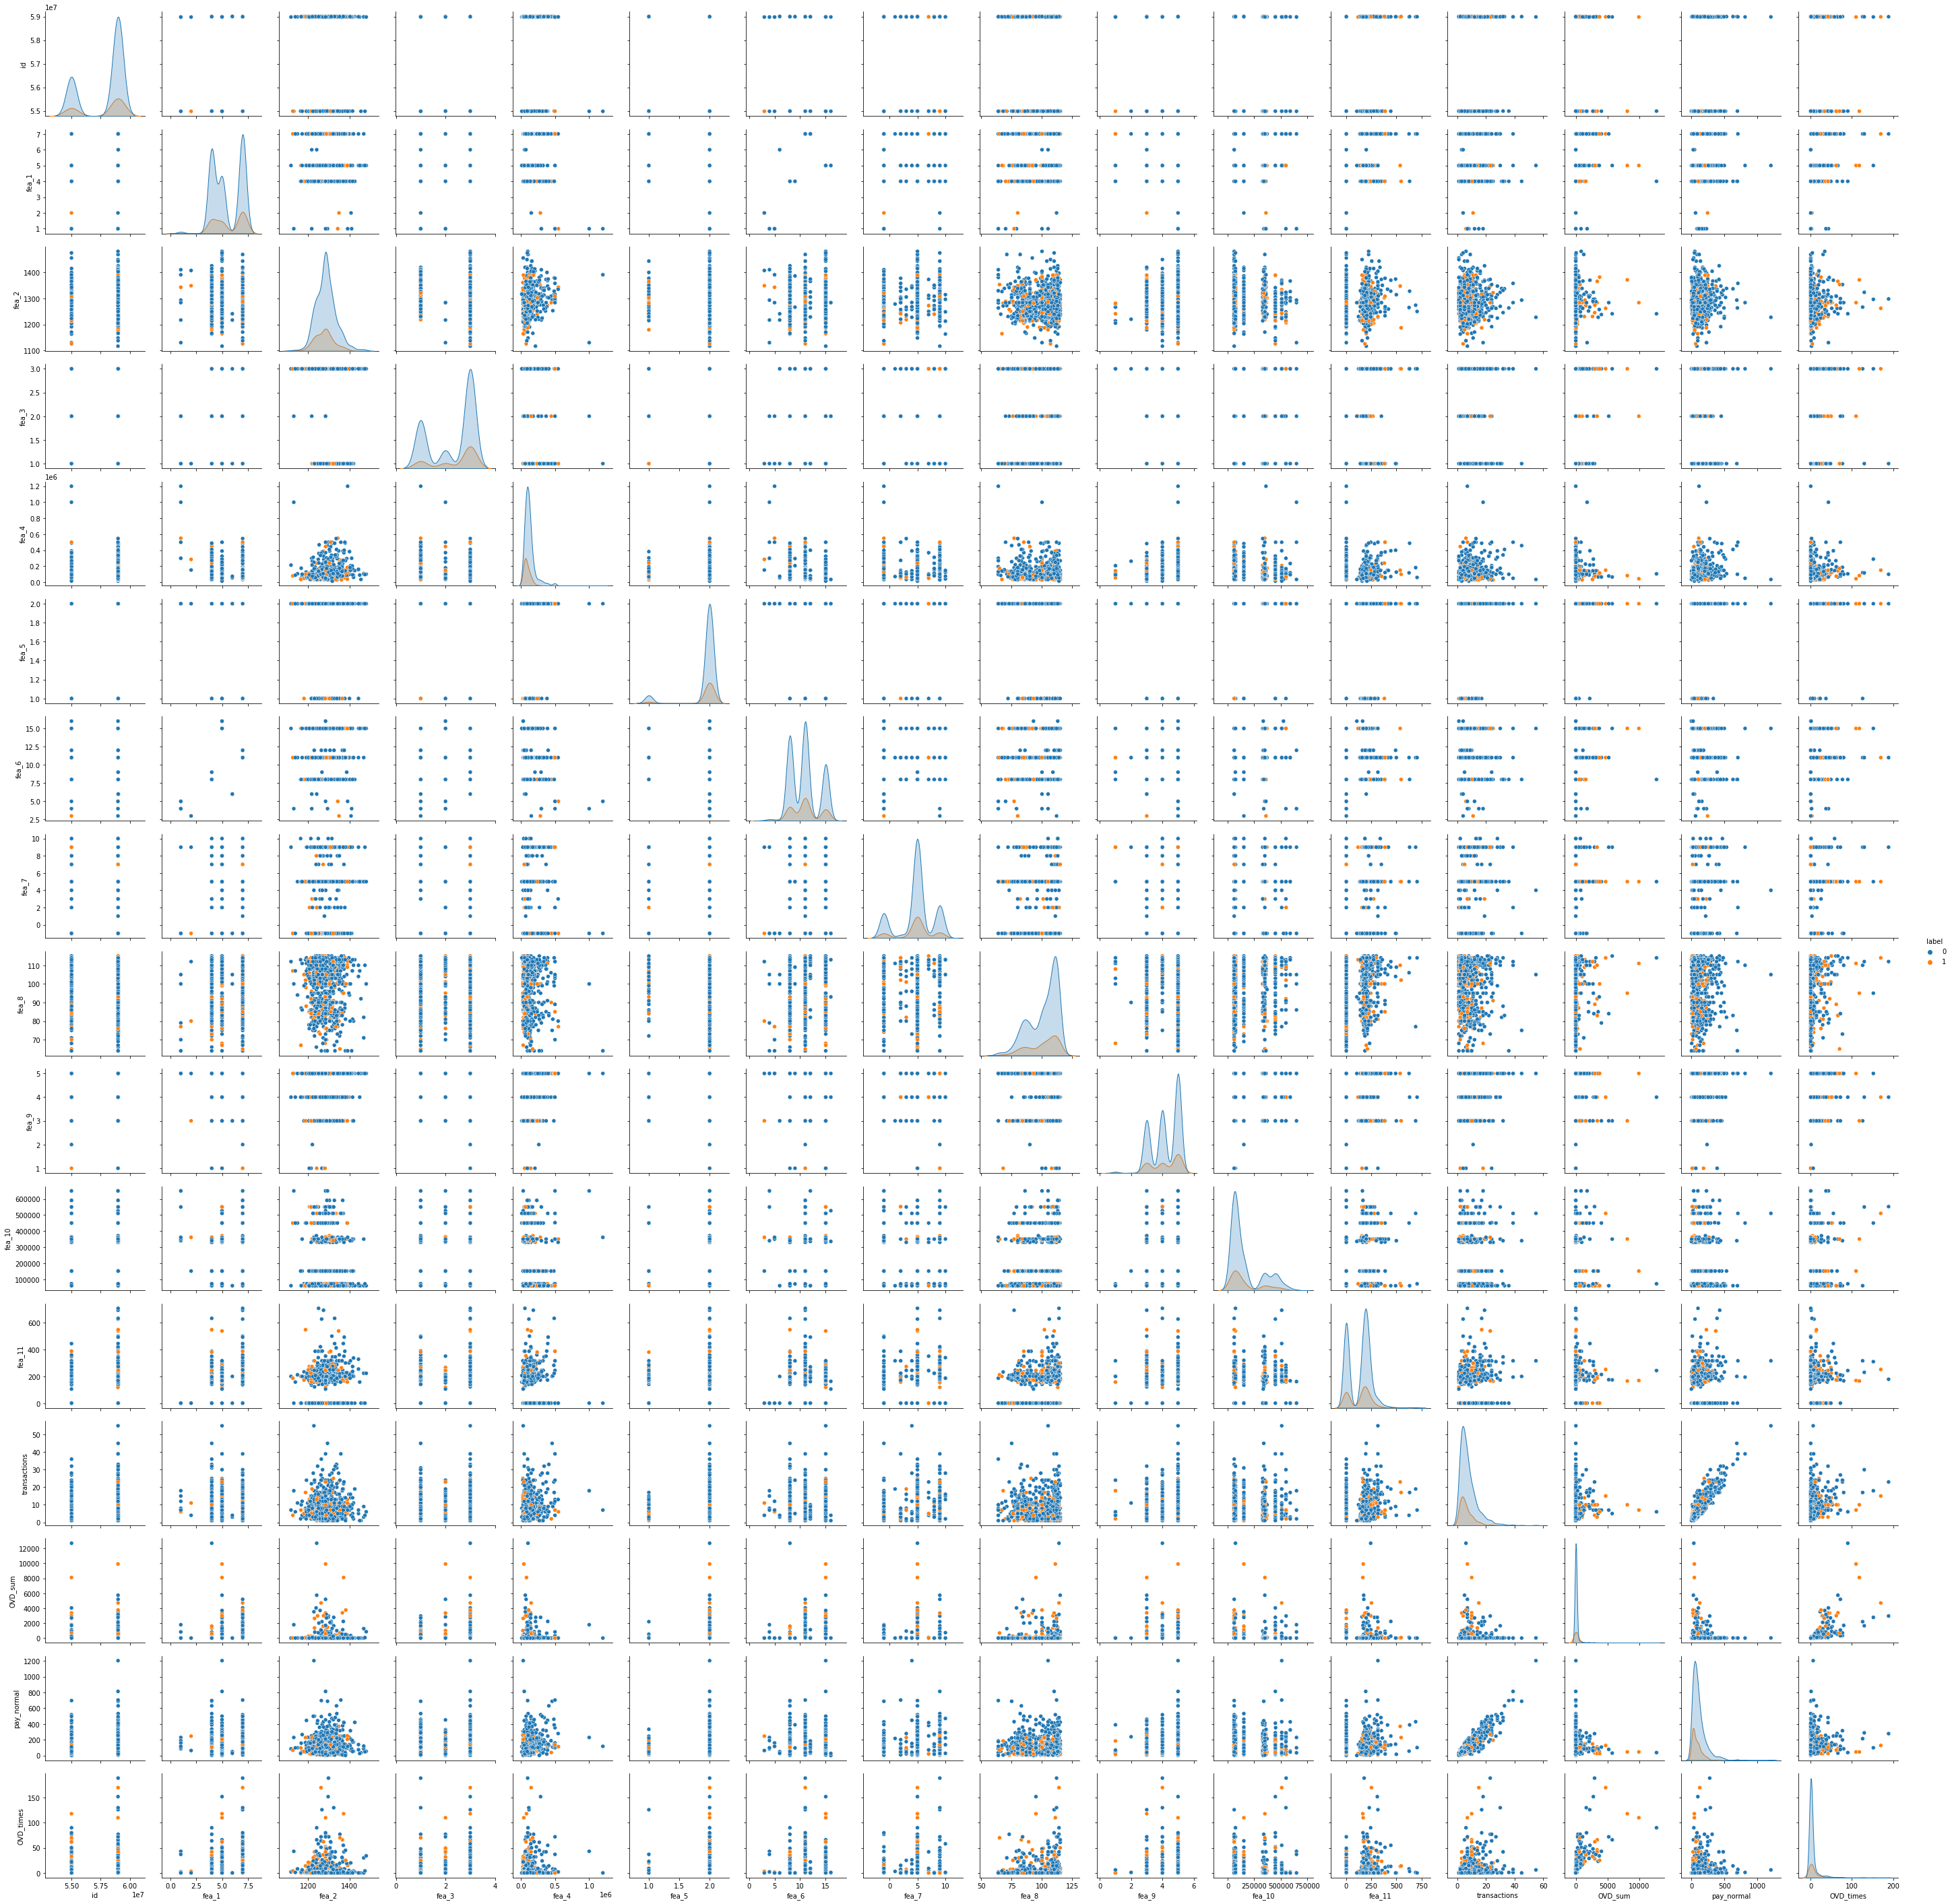

In [172]:
sns.pairplot(data=customers, hue='label')